In [52]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



In [53]:
mystring = 'sum'

In [54]:
#by the evaluate function we can specilizie a sum functionز
eval(mystring)

<function sum(iterable, start=0, /)>

In [55]:
myfunc = eval('sum')

In [56]:
myfunc([1,2,3])

6

In [57]:
#All the 6 methods for comparision in a list 
#Note how we are using strings , Later on we'll use the eval()function to convert to function.
#This is all the methods we use for actual comparision of the template matching.
#we use eval to convert each string to a function 

#methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2._TM_SQDIFF','cv2.TM_SQDIFF_NORMED']
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

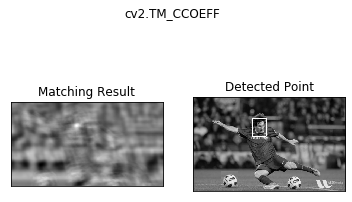

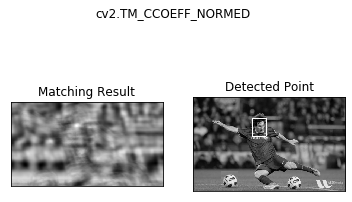

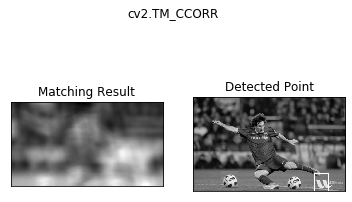

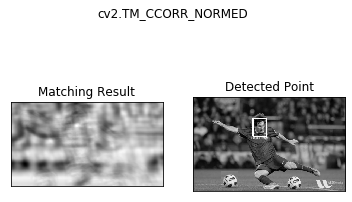

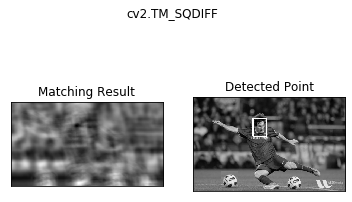

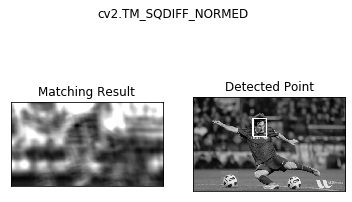

In [60]:

img = cv2.imread('messi5.jpg',0)
img2 = img.copy()
template = cv2.imread('messi_face.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

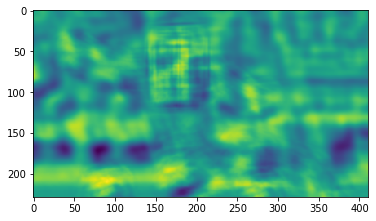

In [63]:
#res is a heat map , it has a higher values where it found the highest correlation where the match actually occurred . 
# the yellow point belives it found the highest mook's maximum value match and basically corresponds to the top of the image.

my_method = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(img,template,my_method)
plt.imshow(res )
